In [72]:
%config IPCompleter.greedy=True

In [52]:
import sqlite3
import pandas as pd

# Load Amazon Food Review Data

In [53]:
con = sqlite3.connect('C:\\Users\\Mekakris\\Documents\\AC\\amazon-fine-food-reviews-data\\database.sqlite')

data = pd.read_sql_query("select * from reviews where score!=3",con)

data=data[:3000]

def parition(x):
    if x<3:
        return "negative"
    return "positive"

actualscore=data['Score']


positiveNegative=actualscore.map(parition)
data['Score']=positiveNegative

print(data.shape)



(3000, 10)


# Remove Duplicates from data

In [54]:

data=data.sort_values('ProductId',axis=0,ascending=True)

# inplace =True will update the existing data frame. False with return a new copy just like below
data=data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep="first",inplace=False)

print(data.shape)

data=data[data.HelpfulnessNumerator<data.HelpfulnessDenominator]

print(data.shape)

data['Score'].value_counts()

(2991, 10)
(588, 10)


positive    343
negative    245
Name: Score, dtype: int64

# Get English stopwords set

In [55]:
import nltk
from nltk.corpus import stopwords

stpwords= set(stopwords.words('english'))

print(stpwords)

{"that'll", 'shouldn', 'them', 'of', 'i', 'theirs', 'more', 'again', "mightn't", 'not', 'than', 'o', 'here', 'been', "don't", 'or', 'were', 'same', "you'd", 'above', 'where', 'both', 'why', 'am', 'm', 'nor', 'it', 'weren', 'own', 'after', 'all', 'most', 'is', 'into', 'll', 'was', 'too', 'once', 'who', 'wasn', 'this', 'my', 'when', 'himself', 'few', 'under', "weren't", 'until', 'hadn', 'by', 'he', 'themselves', 'over', 'didn', "haven't", 'won', 'those', 'has', "didn't", 'me', "needn't", 'an', 'at', 'having', 'each', 'herself', 'your', 're', 'mightn', 'aren', "hadn't", 'itself', 'she', 'further', 'our', 'do', "shouldn't", 'they', 'below', 'y', 'out', 'yours', 'that', 'there', 'just', "she's", 'mustn', "shan't", 't', 's', 'in', 'while', 'her', "couldn't", 'ours', "mustn't", 'ourselves', 'for', 'isn', 'because', 'their', 'haven', "isn't", 'hers', 'as', 'had', 'and', 'up', 'how', 'some', "wouldn't", 'but', 'during', 'between', 'with', 'being', 'a', 'doesn', 'shan', "you're", 'then', 'you', 

In [56]:
# Remove some of the words from stopwrod list

In [57]:
stpwords.remove('not')


# Add words to the stopword list

In [58]:
#print(stpwords)
stpwords.add('not')
#If we have more stopwrds use stpwords=stpwords.union(urcustomstopwordsset)
#print(stpwords)

# Remove the stopwords and clean html from the review


In [59]:
import re
import nltk
sno=nltk.stem.SnowballStemmer('english')

In [60]:
def cleanhtml(sentence): #function to clean the word of any html-tags\n",
        cleanr = re.compile('<.*?>')
        cleantext = re.sub(cleanr, ' ', sentence)
        return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters\n",
        cleaned = re.sub(r'[?|!|\'|\"|#]',r'',sentence)
        cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
        return  cleaned

 
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here\n",
all_negative_words=[] # store words from -ve reviews here.\n",
s=''

#data=data.iloc[0:1000]


for sent in data['Text'].values:
    filtered_sentence=[]
    #print(sent);\n",
    sent=cleanhtml(sent) # remove HTMl tags\n",
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stpwords):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (data['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews\n",
                    if(data['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews\n",
                else:
                    continue
            else:
               continue 
    #print(filtered_sentence)\n",
    str1 = b" ".join(filtered_sentence) #final string of cleaned words\n
    #print(\"***********************************************************************\")\n",
    final_string.append(str1)
    i+=1

    #rint(final_string)



# Save the preprocessed data in to sql lite for future usage

In [62]:

data['Text']=final_string


# store final table into an SQlLite table for future.
conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str
data.to_sql('PractiseCleanedReviews', conn, flavor=None, schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)



# EDA on the positive and negative review words

In [71]:
most_positive= nltk.FreqDist(all_positive_words)
most_negative= nltk.FreqDist(all_negative_words)

print(most_positive.most_common(20))
print(most_negative.most_common(20))

# same analysis using positive and negative words
df=pd.DataFrame({'pos':all_positive_words})
#print(df['pos'].value_counts(ascending =False))

[(b'chip', 170), (b'like', 147), (b'flavor', 146), (b'tast', 142), (b'good', 135), (b'tea', 106), (b'great', 104), (b'one', 104), (b'love', 104), (b'use', 99), (b'product', 91), (b'make', 85), (b'bag', 78), (b'tri', 74), (b'water', 73), (b'get', 65), (b'realli', 64), (b'amazon', 59), (b'much', 58), (b'potato', 57)]
[(b'like', 142), (b'tast', 138), (b'chip', 131), (b'product', 125), (b'one', 103), (b'flavor', 99), (b'bag', 98), (b'food', 86), (b'tri', 74), (b'good', 72), (b'use', 70), (b'would', 65), (b'drink', 64), (b'water', 63), (b'eat', 62), (b'order', 61), (b'buy', 58), (b'much', 58), (b'tea', 58), (b'get', 56)]
b'chip'           170
b'like'           147
b'flavor'         146
b'tast'           142
b'good'           135
b'tea'            106
b'great'          104
b'love'           104
b'one'            104
b'use'             99
b'product'         91
b'make'            85
b'bag'             78
b'tri'             74
b'water'           73
b'get'             65
b'realli'          64
b'

# Applying t-sne on the pre-Processed review data

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import numpy as np
from sklearn.preprocessing import StandardScaler


count_vect = TfidfVectorizer(ngram_range=(1,2))# -> this is for normal text vector

labels=data['Score'].values

final=count_vect.fit_transform(data['Text'].values)


model=TSNE(n_components=2,random_state=0)

standardized_data = StandardScaler(with_mean=False).fit_transform(final)
print(standardized_data.shape)

tnse_data=model.fit_transform(standardized_data.toarray())

tnse_data =np.vstack((tnse_data.T,labels)).T


(588, 23759)


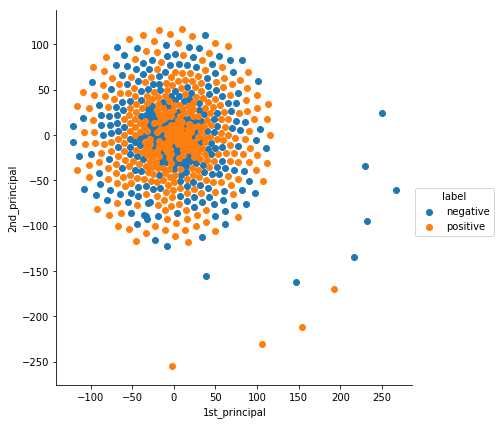

In [89]:
import seaborn as sb
import matplotlib.pyplot as plt

dataframe=pd.DataFrame(data=tnse_data,columns=("1st_principal","2nd_principal","label"))
sb.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()

plt.show()
